In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.8.0+cu126'

# Data preparing

In [2]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.015
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias + torch.normal(mean=0.0, std=0.05, size=(len(X),)).unsqueeze(dim=1)

X[:10], y[:10]

(tensor([[0.0000],
         [0.0150],
         [0.0300],
         [0.0450],
         [0.0600],
         [0.0750],
         [0.0900],
         [0.1050],
         [0.1200],
         [0.1350]]),
 tensor([[0.2777],
         [0.2767],
         [0.3477],
         [0.3695],
         [0.3336],
         [0.3205],
         [0.2819],
         [0.3181],
         [0.4225],
         [0.4371]]))

In [3]:
X.shape, y.shape

(torch.Size([67, 1]), torch.Size([67, 1]))

In [4]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(53, 53, 14, 14)

In [5]:
train_split

53

In [6]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="r", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="orange", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

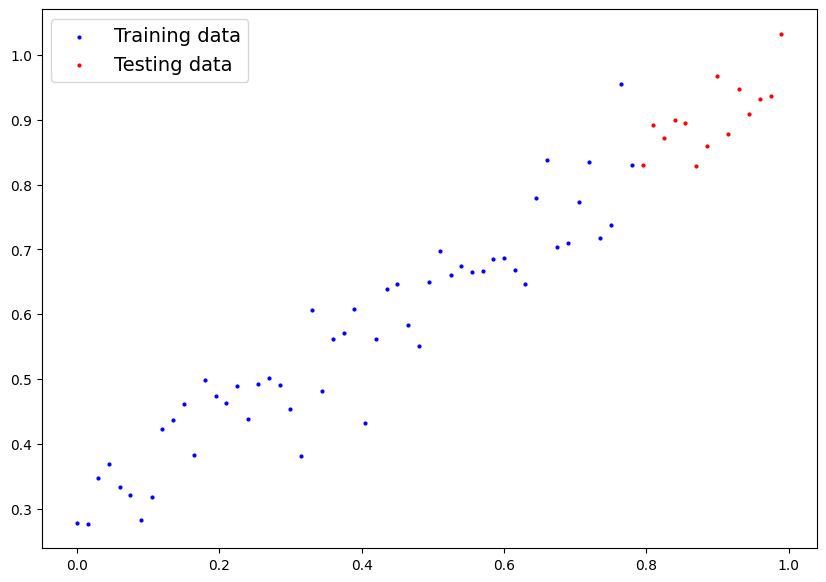

In [7]:
plot_predictions()

# Build model

In [8]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return (self.weights * x) + self.bias # <- this is the linear regression formula (y = m*x + b)

In [9]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
# Make predictions with model
with torch.inference_mode(): 
    y_preds = model_0(X_test)
    print(y_preds)

tensor([[0.3965],
        [0.4015],
        [0.4066],
        [0.4116],
        [0.4167],
        [0.4217],
        [0.4268],
        [0.4318],
        [0.4369],
        [0.4419],
        [0.4470],
        [0.4520],
        [0.4571],
        [0.4621]])


In [12]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 14
Number of predictions made: 14
Predicted values:
tensor([[0.3965],
        [0.4015],
        [0.4066],
        [0.4116],
        [0.4167],
        [0.4217],
        [0.4268],
        [0.4318],
        [0.4369],
        [0.4419],
        [0.4470],
        [0.4520],
        [0.4571],
        [0.4621]])


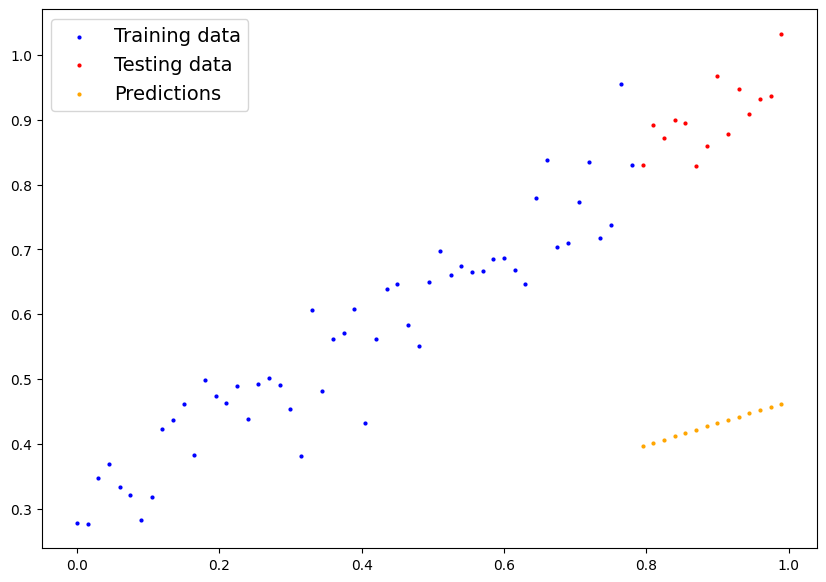

In [13]:
plot_predictions(predictions=y_preds)

In [14]:
y_test - y_preds

tensor([[0.4336],
        [0.4905],
        [0.4646],
        [0.4884],
        [0.4782],
        [0.4072],
        [0.4327],
        [0.5357],
        [0.4408],
        [0.5059],
        [0.4619],
        [0.4797],
        [0.4800],
        [0.5706]])

# Train the model

In [15]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

Epoch: 0 | MAE Train Loss: 0.30085933208465576 | MAE Test Loss: 0.4629240930080414 
Epoch: 10 | MAE Train Loss: 0.1856493502855301 | MAE Test Loss: 0.32811662554740906 
Epoch: 20 | MAE Train Loss: 0.09769856929779053 | MAE Test Loss: 0.21254336833953857 
Epoch: 30 | MAE Train Loss: 0.060075342655181885 | MAE Test Loss: 0.13578014075756073 
Epoch: 40 | MAE Train Loss: 0.05336163565516472 | MAE Test Loss: 0.10726593434810638 
Epoch: 50 | MAE Train Loss: 0.05177018791437149 | MAE Test Loss: 0.09938429296016693 
Epoch: 60 | MAE Train Loss: 0.05080511420965195 | MAE Test Loss: 0.09741286188364029 
Epoch: 70 | MAE Train Loss: 0.04986654967069626 | MAE Test Loss: 0.09544145315885544 
Epoch: 80 | MAE Train Loss: 0.04918086901307106 | MAE Test Loss: 0.09287484735250473 
Epoch: 90 | MAE Train Loss: 0.04862191528081894 | MAE Test Loss: 0.08944903314113617 
Epoch: 100 | MAE Train Loss: 0.04811721295118332 | MAE Test Loss: 0.08522290736436844 
Epoch: 110 | MAE Train Loss: 0.047612514346838 | MAE Te

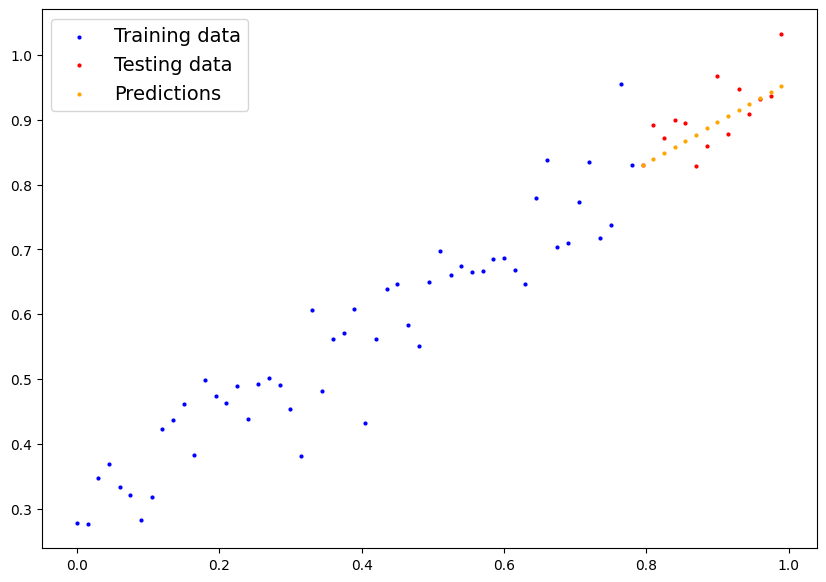

In [16]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 1000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

plot_predictions(predictions=test_pred)

In [17]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6303])), ('bias', tensor([0.3288]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


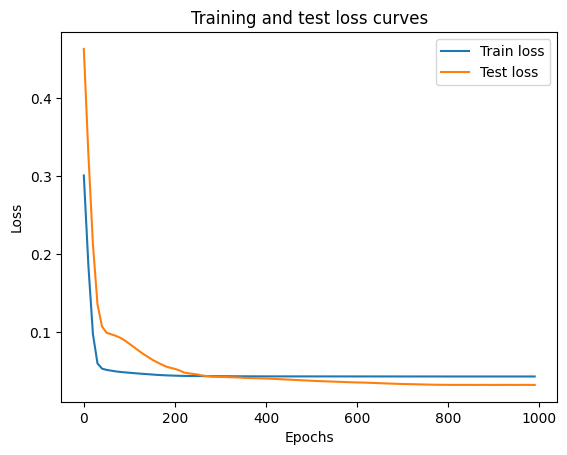

In [18]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

# Saving and loading the model

In [19]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH) 

Saving model to: models\pytorch_workflow_model_0.pth


In [20]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [21]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6303])), ('bias', tensor([0.3288]))])

In [22]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    test_pred = model_0(X_test)
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [29]:
# Compare previous model predictions with loaded model predictions (these should be the same)
test_pred == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Using linear layer

In [2]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias + torch.normal(mean=0.0, std=0.05, size=(len(X),)).unsqueeze(dim=1)

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2997],
         [0.3177],
         [0.3116],
         [0.2916],
         [0.3582],
         [0.3790],
         [0.3596],
         [0.3987],
         [0.5274],
         [0.4340]]))

In [4]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

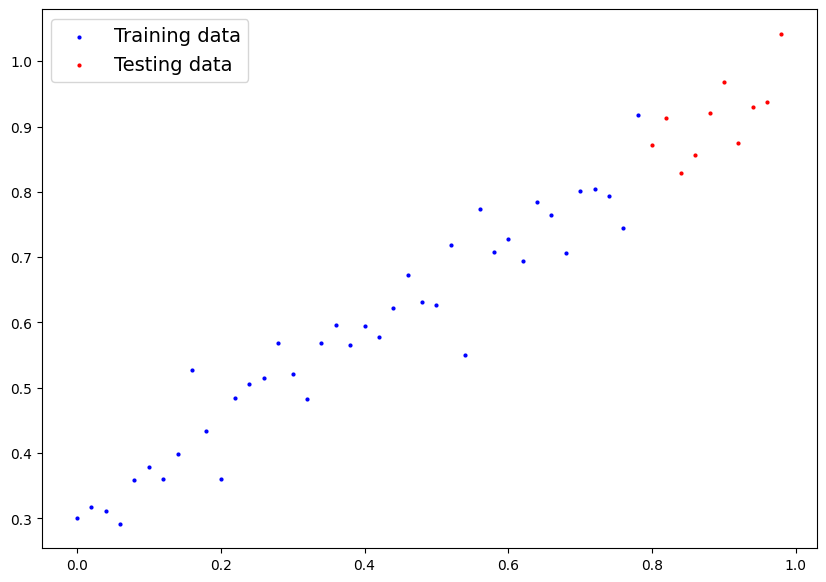

In [7]:
# Note: If you've reset your runtime, this function won't work, 
# you'll have to rerun the cell above where it's instantiated.
plot_predictions(X_train, y_train, X_test, y_test)

In [8]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
    
    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always needed but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [9]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

In [10]:
# Set model to GPU if it's available, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cuda', index=0)

In [11]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.001)

In [12]:
torch.manual_seed(42)

# Set the number of epochs 
epochs = 1000 

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)
    
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5516211986541748 | Test loss: 0.5948025584220886
Epoch: 100 | Train loss: 0.4364127218723297 | Test loss: 0.4600944519042969
Epoch: 200 | Train loss: 0.321204274892807 | Test loss: 0.3253863751888275
Epoch: 300 | Train loss: 0.2059958428144455 | Test loss: 0.19067826867103577
Epoch: 400 | Train loss: 0.09218302369117737 | Test loss: 0.06024103984236717
Epoch: 500 | Train loss: 0.04298323020339012 | Test loss: 0.0404895544052124
Epoch: 600 | Train loss: 0.04085490107536316 | Test loss: 0.043545305728912354
Epoch: 700 | Train loss: 0.0402960330247879 | Test loss: 0.0431261844933033
Epoch: 800 | Train loss: 0.03973700478672981 | Test loss: 0.04270706698298454
Epoch: 900 | Train loss: 0.039177946746349335 | Test loss: 0.04228794574737549


In [13]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html 
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6166]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3366], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [14]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8299],
        [0.8423],
        [0.8546],
        [0.8669],
        [0.8793],
        [0.8916],
        [0.9039],
        [0.9162],
        [0.9286],
        [0.9409]], device='cuda:0')

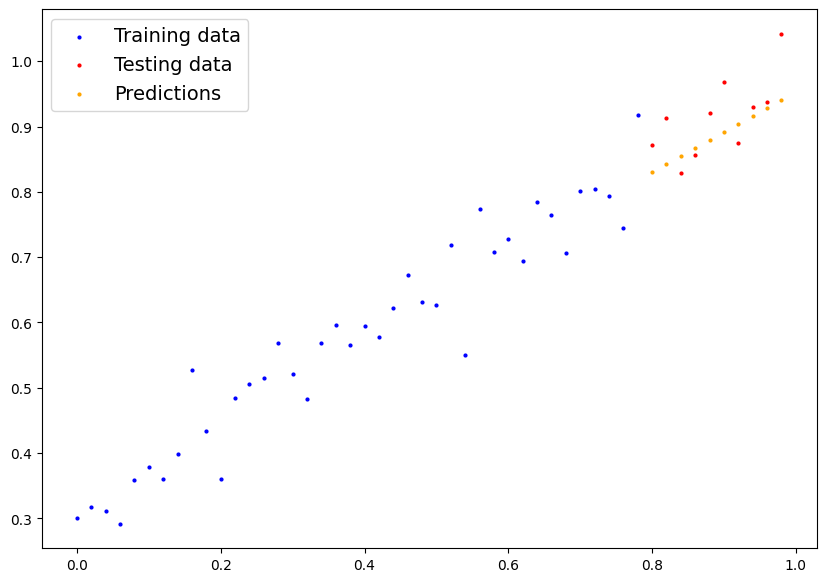

In [17]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu())

In [18]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH) 

Saving model to: models\pytorch_workflow_model_1.pth


In [19]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict 
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


In [26]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6166]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3366], device='cuda:0'))])

In [27]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')